<h1 style="text-align: center;">Breast Cancer Classification</h1>

# Importing of Libraries

In [358]:
import warnings
warnings.filterwarnings('ignore')

In [359]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [360]:
columns = ["id","diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean",
           "compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean",
           "radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se",
           "concave points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst",
           "area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst",
           "fractal_dimension_worst",]

df = pd.read_csv('Dataset/wdbc.csv', header=None, names=columns, engine='python')
df.reset_index(inplace=True)
df = df.drop(columns=['index', 'id'])
df

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...        25.380          17.33           184.60   
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2597  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...         

# Data Preprocessing

In [361]:
# checking the dimensions of the dataset
print(f"Total number of data points: {df.shape[0]}")
print(f"Total number of features: {df.shape[1]}")

Total number of data points: 569
Total number of features: 31


In [362]:
# checking the statistical measures of the features in the dataset
df.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

In [363]:
# checking for null values
null_vals = df.isnull().values.any()
if null_vals == True:
    print("There are missing values in the dataset!")
else:
    print("There are no null values in the dataset!")

df.isnull().sum()

There are no null values in the dataset!


diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Since the diagnosis column has only M (Malignant) and B (Benign), this can be replaced with 1 for M and 0 for B.

In [364]:
print("Malignant being replaced with: 1")
print("Benign being replaced with: 0")

# replacing malignant and benign with 1 and 0
df['diagnosis'] = df['diagnosis'].map(lambda row: 1 if row =='M' else 0)
df

Malignant being replaced with: 1
Benign being replaced with: 0


diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            1        17.99         10.38          122.80     1001.0   
1            1        20.57         17.77          132.90     1326.0   
2            1        19.69         21.25          130.00     1203.0   
3            1        11.42         20.38           77.58      386.1   
4            1        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
564          1        21.56         22.39          142.00     1479.0   
565          1        20.13         28.25          131.20     1261.0   
566          1        16.60         28.08          108.30      858.1   
567          1        20.60         29.33          140.10     1265.0   
568          0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...        25.380          17.33           184.60   
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2597  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    .

In [365]:
# checking for unique values in the columns
df.nunique()

diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: int64

We have to check for the balance between the Malignant and Benign classes in the dataframe.

# Feature Engineering

In [366]:
print(f"Total number of data points: {len(df)}")
malignant_percentage = round(df['diagnosis'].mean(),3) * 100
benign_percentage = (1 - round(df['diagnosis'].mean(),3)) * 100

print(f"Percentage of Malignant diagnosis: {malignant_percentage}%")
print(f"Percentage of Benign diagnosis: {benign_percentage}%")

Total number of data points: 569
Percentage of Malignant diagnosis: 37.3%
Percentage of Benign diagnosis: 62.7%


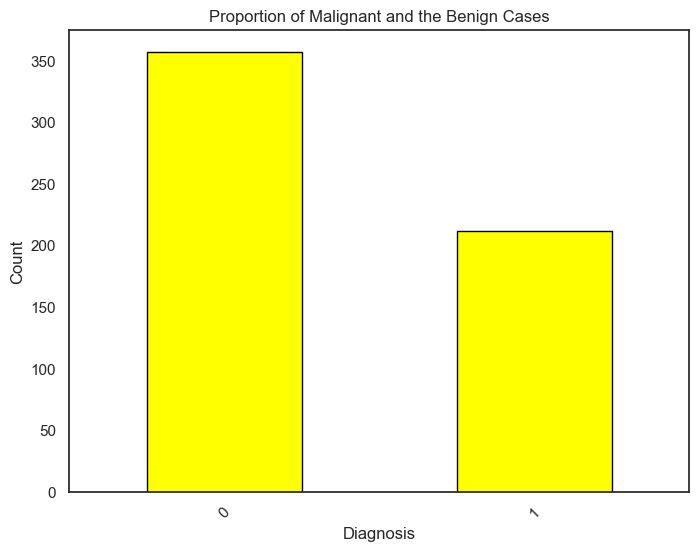

In [367]:
plt.figure(figsize=(8,6))
df['diagnosis'].value_counts().plot(kind='bar', color='yellow', edgecolor='black')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title("Proportion of Malignant and the Benign Cases")
plt.xticks(rotation=45)
plt.show()

This shows us that there is a clear imbalance between the two classes in the dataset. This gives rise to the phenomenon of Benign diagnosis being a majority class and Malignant diagnosis being a minority class.

Next we could draw the correlation matrix to see how the Pearson's Correlation Coefficient defines the relationships between the continous variables.

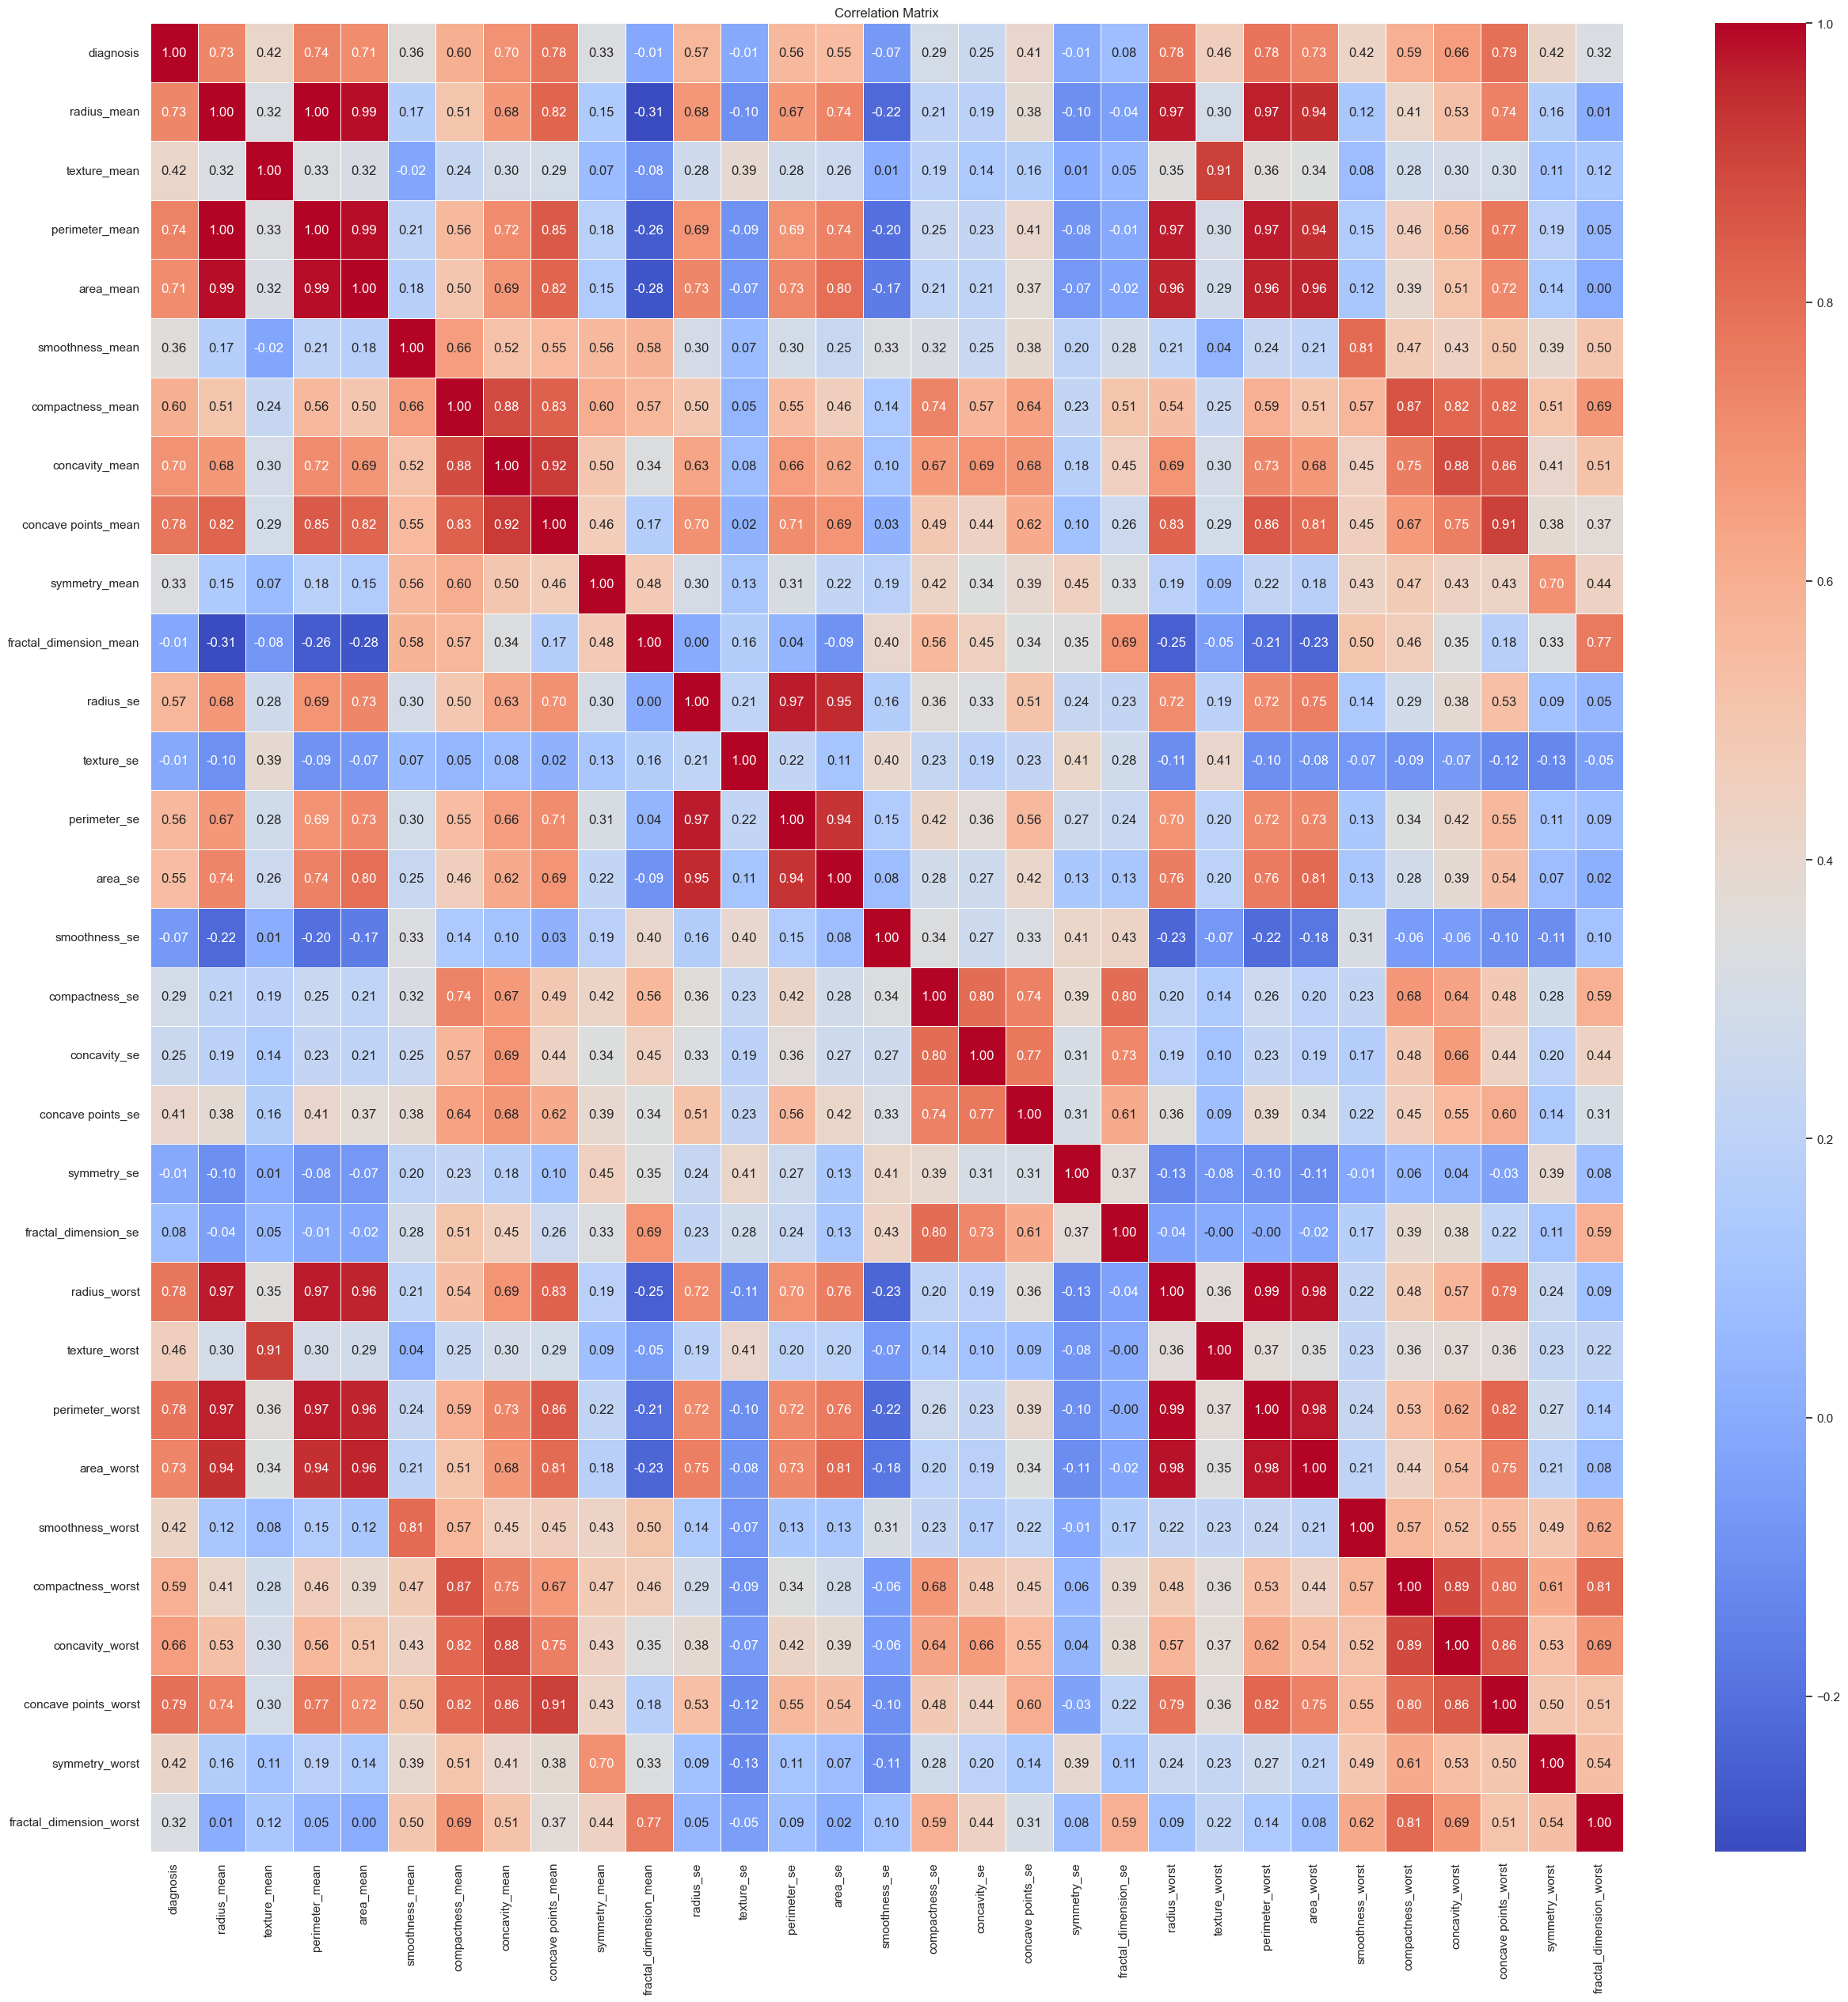

In [368]:
corr = df.corr()

plt.figure(figsize=(30,30))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

Let us generate the diagonal correlation matrix to enable an easier way to view the correlations.

<Axes: >

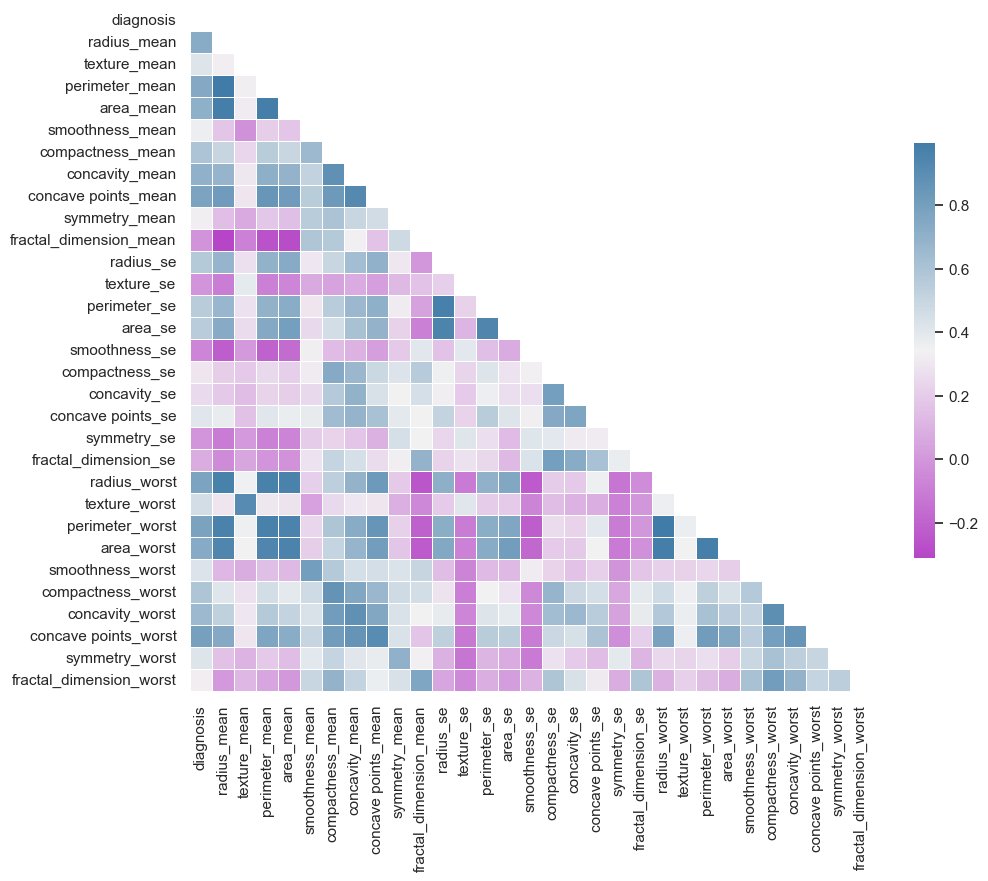

In [369]:
sns.set_theme(style="white")
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(300, 600, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap,square=True, linewidths=.5, cbar_kws={"shrink": .6})

Let us draw pair plots for the features.

In [370]:
# sns.pairplot(df, hue='diagnosis', diag_kind='kde')
# plt.show

Let us group the mean features and draw pair plots.

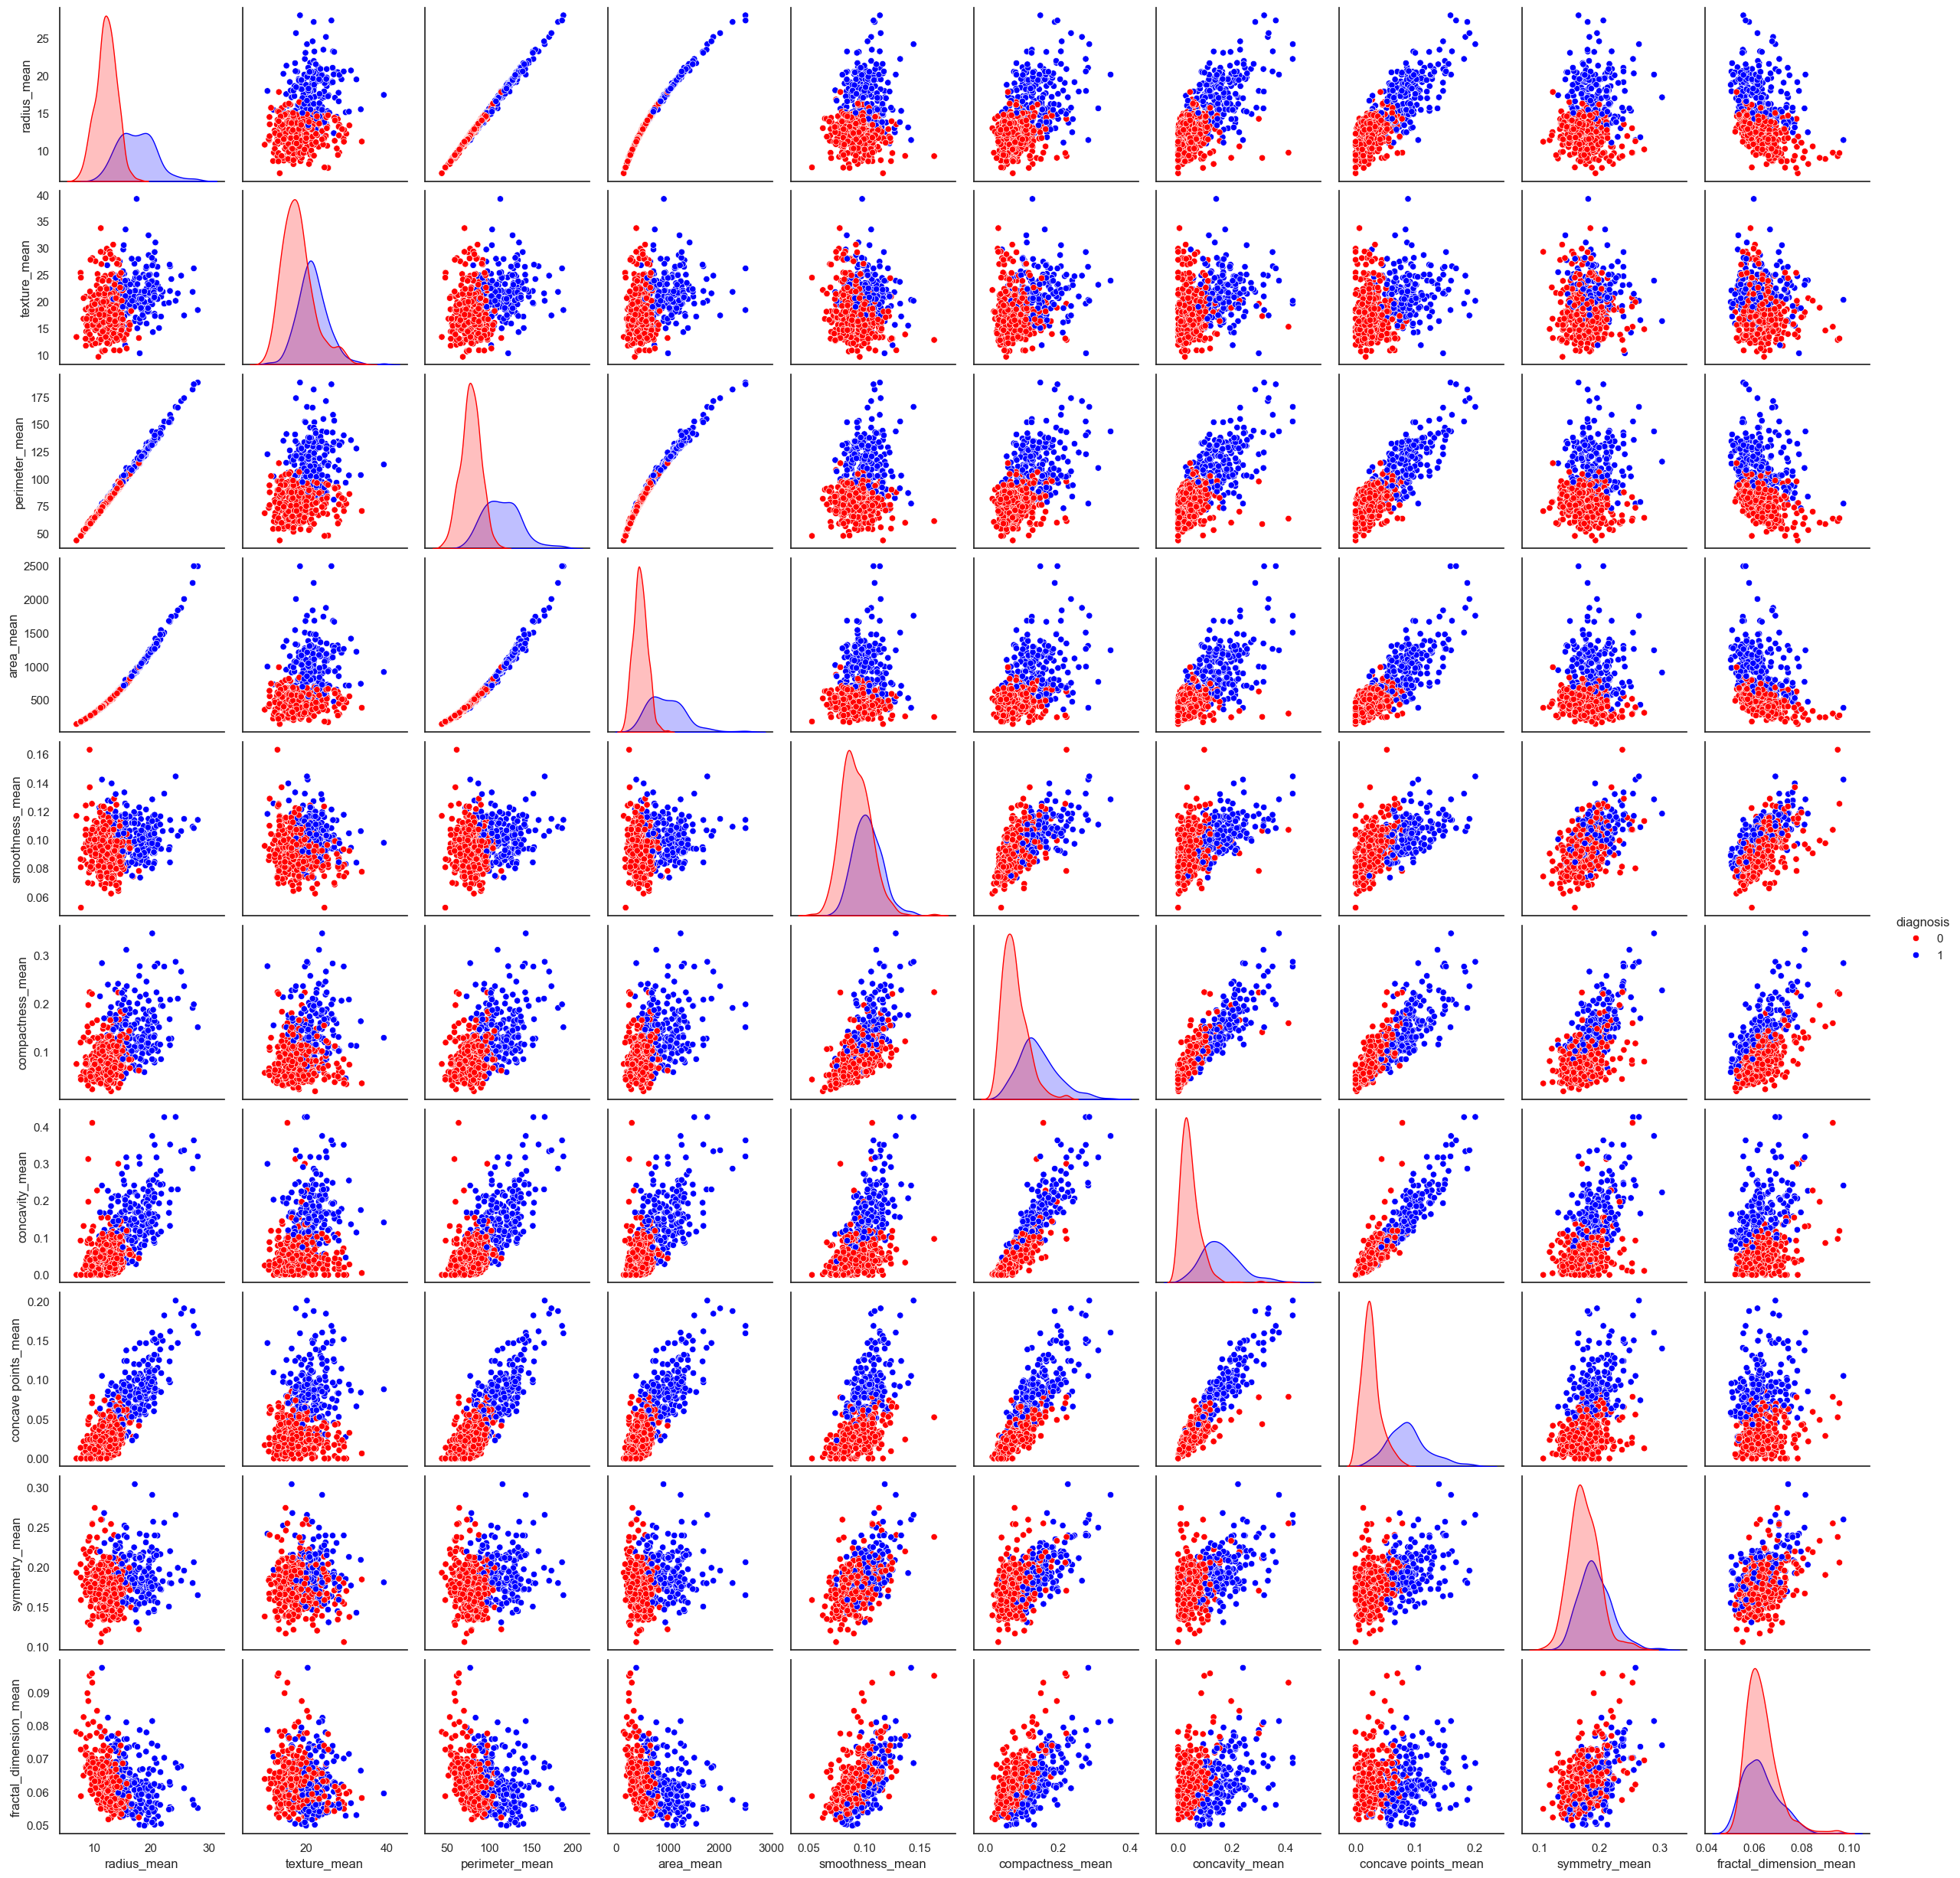

In [371]:
column_means = ('diagnosis', 'radius_mean','texture_mean', 'perimeter_mean','area_mean', 'smoothness_mean', 'compactness_mean',
                 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean')

df_mean = pd.DataFrame(df, columns=column_means)
sns.pairplot(df_mean, hue='diagnosis', diag_kind='kde', palette=['red','blue'])

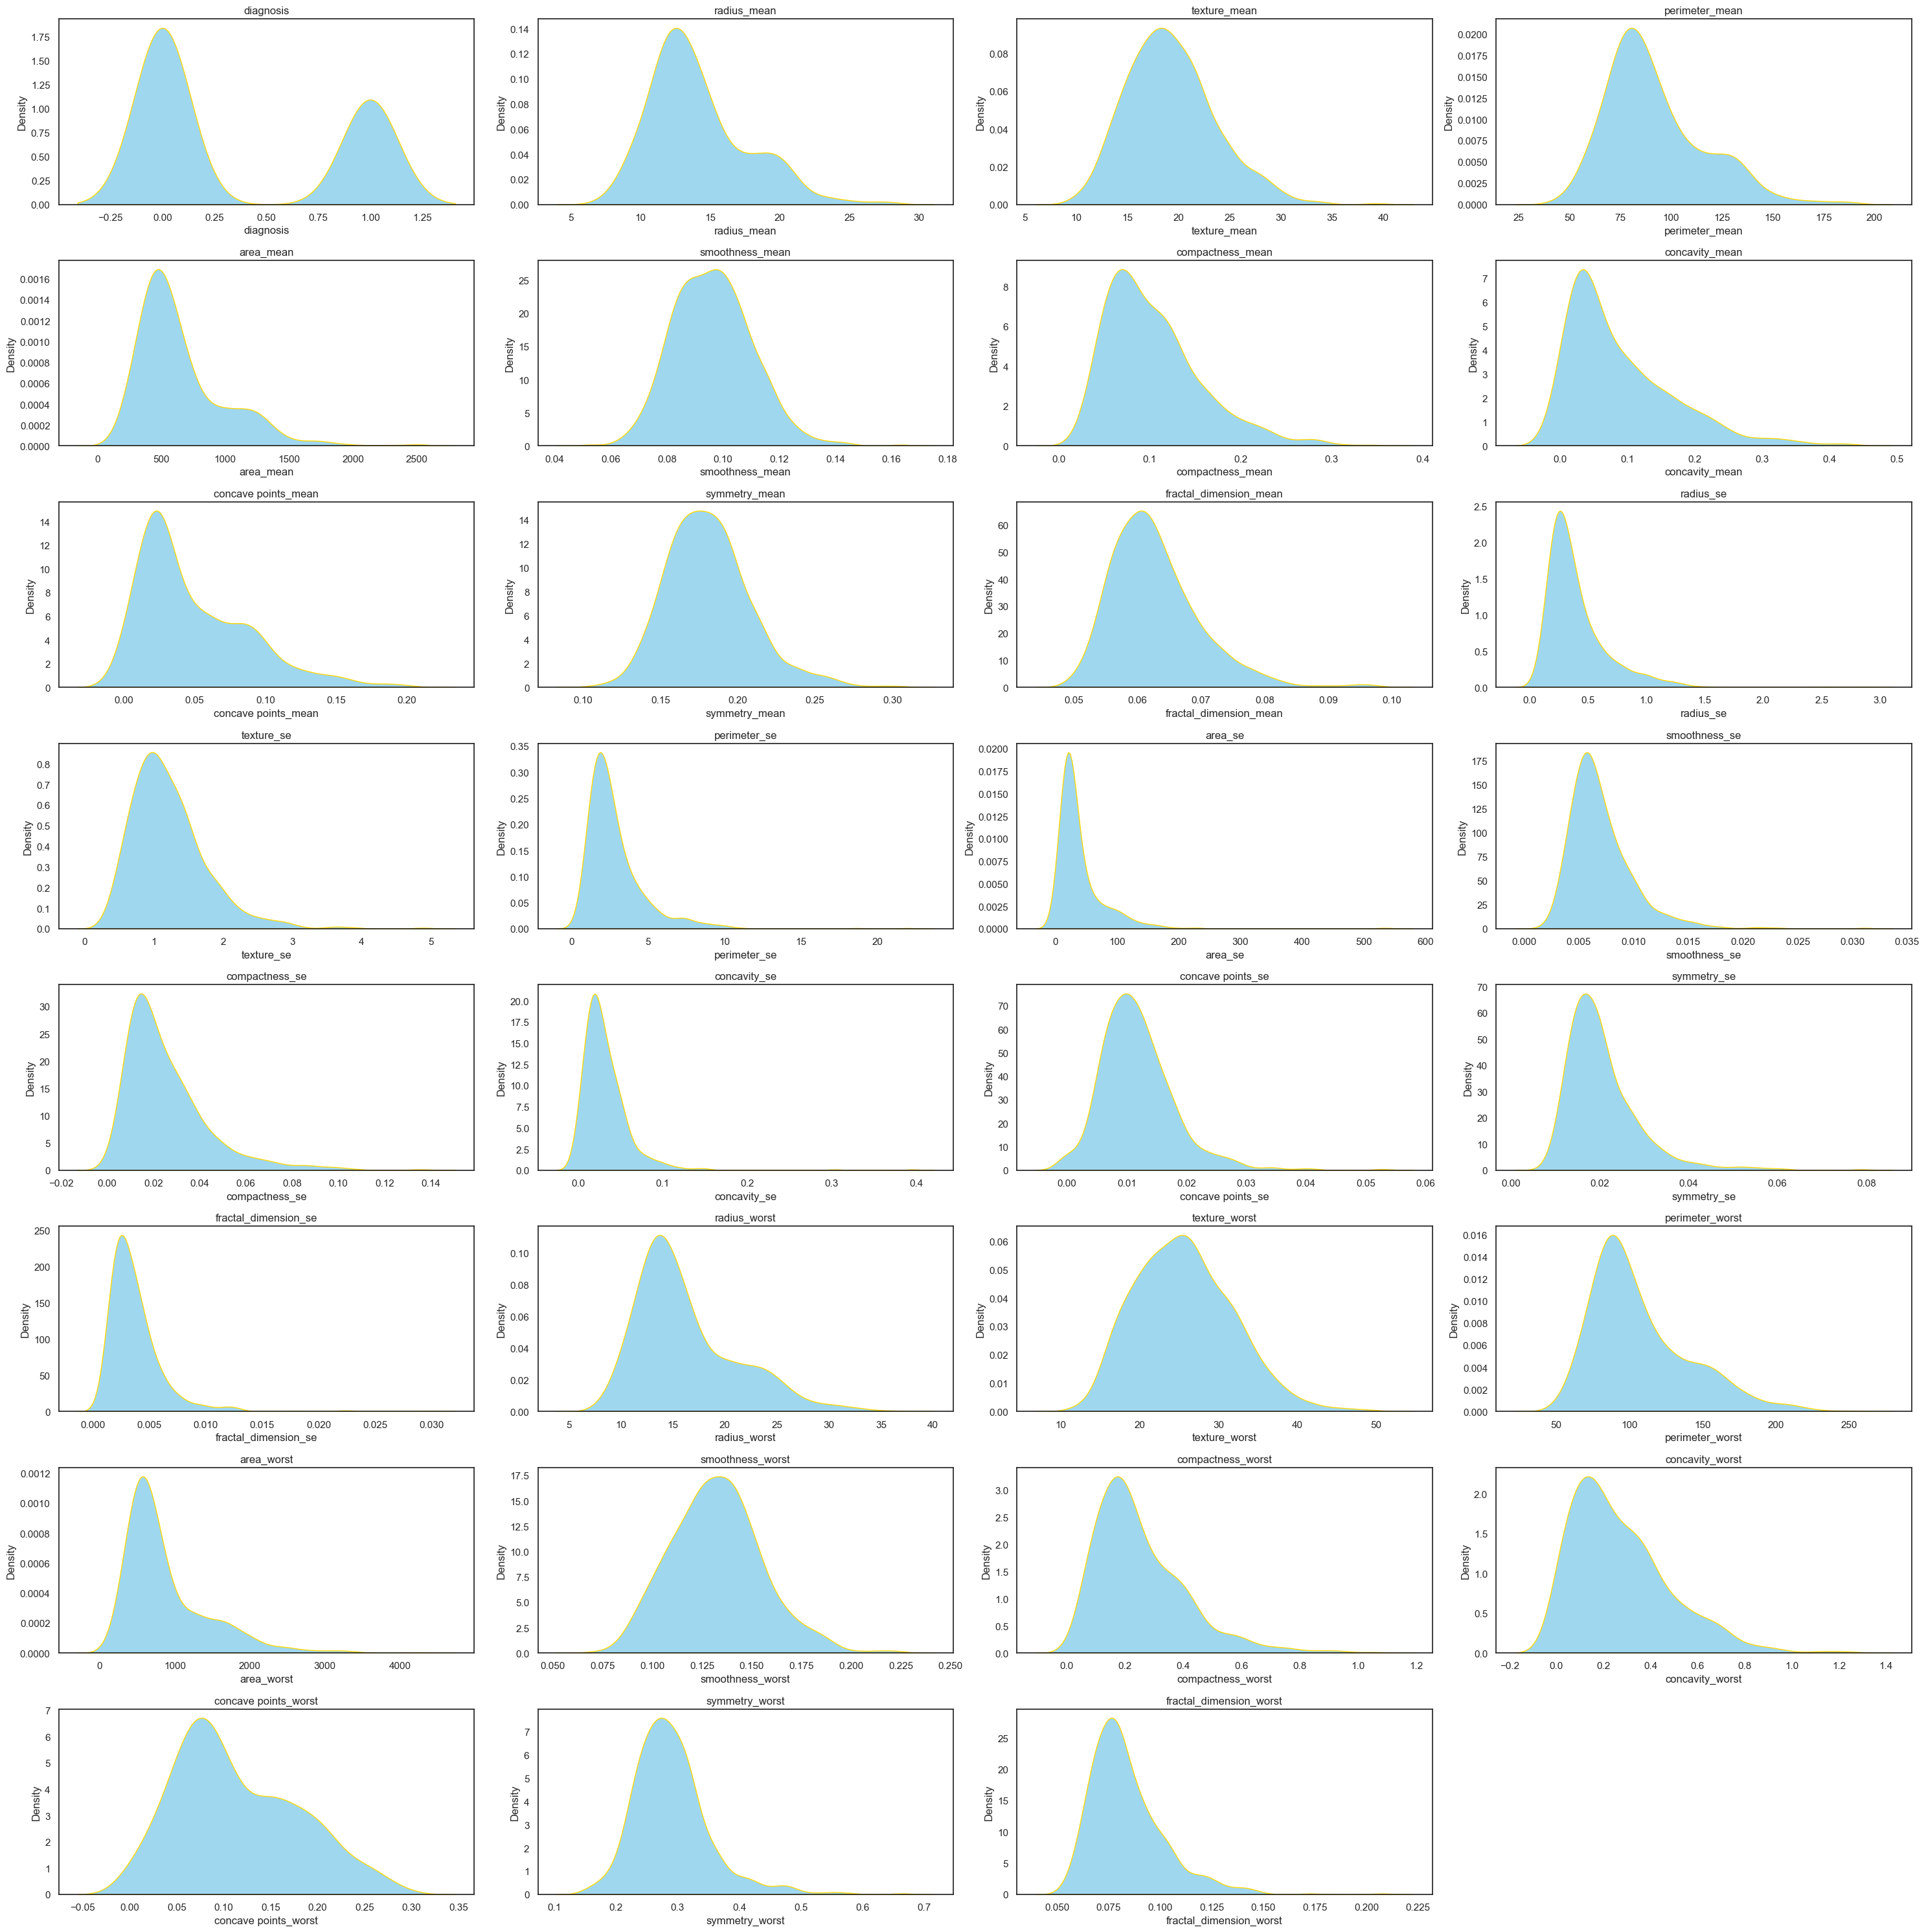

In [372]:
plt.figure(figsize=(30,30))
for i, feature in enumerate(df.columns):
    plt.subplot(8,4,i+1)
    sns.kdeplot(df[feature], shade=True, color='skyblue', edgecolor='gold', alpha=0.8)
    plt.title(feature)
plt.tight_layout()
plt.show()

<Axes: xlabel='variable', ylabel='value'>

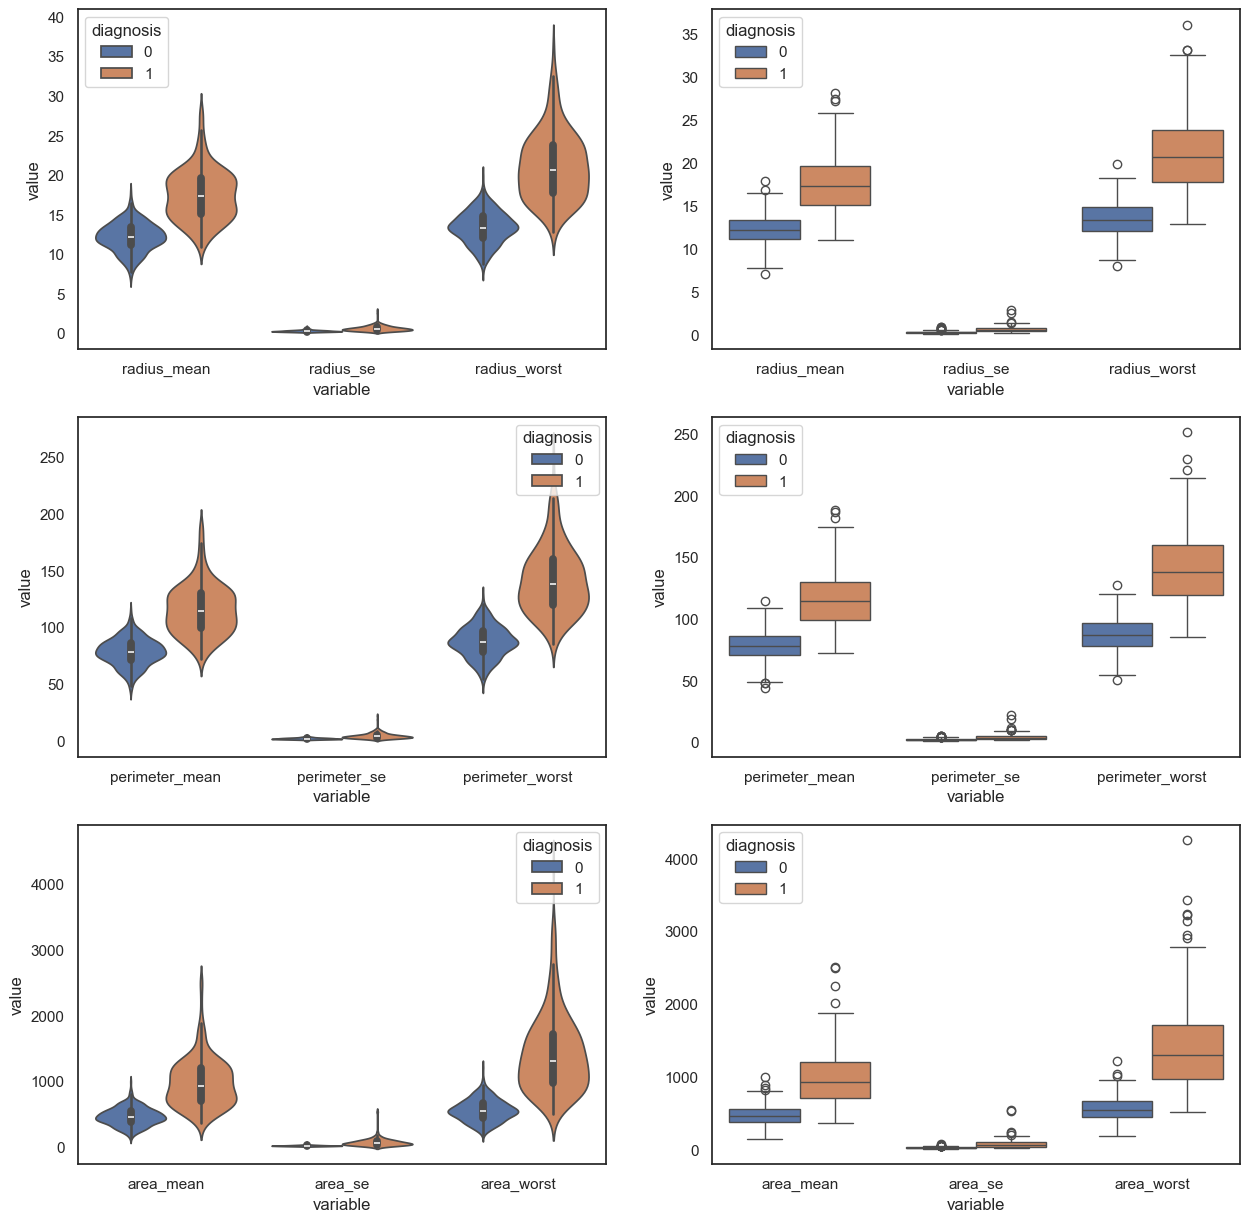

In [373]:
column_set_1 = ['diagnosis' , 'radius_mean', 'radius_se', 'radius_worst']
df_set_1 = pd.DataFrame(df, columns=column_set_1)

column_set_2 = ['diagnosis' , 'perimeter_mean', 'perimeter_se', 'perimeter_worst']
df_set_2 = pd.DataFrame(df, columns=column_set_2)

column_set_3 = ['diagnosis' , 'area_mean', 'area_se', 'area_worst']
df_set_3 = pd.DataFrame(df, columns=column_set_3)

fig, axes = plt.subplots(3,2, figsize=(15,15))
# radius
sns.violinplot(x= "variable" ,y = "value", hue= "diagnosis", data=pd.melt(df_set_1, id_vars='diagnosis'), scale="width", ax = axes[0,0])
sns.boxplot(x= "variable" ,y = "value", hue= "diagnosis", data=pd.melt(df_set_1, id_vars='diagnosis'), ax = axes[0,1])
# perimeter
sns.violinplot(x= "variable" ,y = "value", hue= "diagnosis", data=pd.melt(df_set_2, id_vars='diagnosis'), scale="width", ax = axes[1,0])
sns.boxplot(x= "variable" ,y = "value", hue= "diagnosis", data=pd.melt(df_set_2, id_vars='diagnosis'), ax = axes[1,1])
# area
sns.violinplot(x= "variable" ,y = "value", hue= "diagnosis", data=pd.melt(df_set_3, id_vars='diagnosis'), scale="width", ax = axes[2,0])
sns.boxplot(x= "variable" ,y = "value", hue= "diagnosis", data=pd.melt(df_set_3, id_vars='diagnosis'), ax = axes[2,1])

In [374]:
# def get_box_plot(x):
#     f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
#     sns.boxplot(x, ax=ax_box)
#     sns.displot(x, kde= True)
#     ax_box.set(yticks=[])
#     sns.despine(ax=ax_hist)
#     sns.despine(ax=ax_box, left=True)
#     plt.show()

# # box plots and density plots for the features
# get_box_plot(df['radius_mean'])
# get_box_plot(df['area_mean'])
# get_box_plot(df['perimeter_mean'])
# get_box_plot(df['texture_mean'])
# get_box_plot(df['smoothness_mean'])
# get_box_plot(df['compactness_mean'])
# get_box_plot(df['concavity_mean'])
# get_box_plot(df['concave points_mean'])
# get_box_plot(df['symmetry_mean'])
# get_box_plot(df['fractal_dimension_mean'])

### Principal Component Analysis

Projecting the data onto a 2D frame
Explained variance ratio: [0.44272026 0.18971182]


Text(0.5, 1.0, 'PCA of the Dataset')

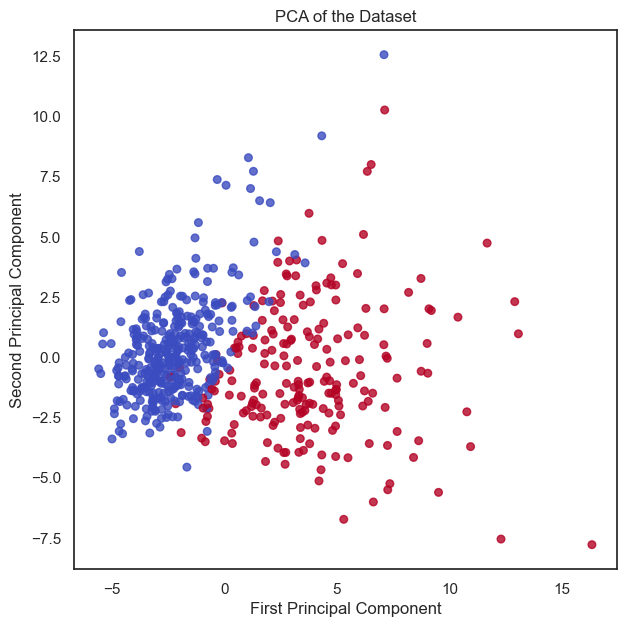

In [375]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

x = df.drop(columns=['diagnosis'], axis=1)
y = df['diagnosis']

x_scaled = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
x_pca_scaled = pca.fit_transform(x_scaled)

print("Projecting the data onto a 2D frame")
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

plt.figure(figsize=(7,7))
plt.scatter(x_pca_scaled[:,0], x_pca_scaled[:,1], c=y, cmap='coolwarm', alpha=0.8, s=30)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of the Dataset')

### tSNE Analysis

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.000s...
[t-SNE] Computed neighbors for 569 samples in 0.036s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 1.414330
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.945797
[t-SNE] KL divergence after 500 iterations: 0.951997
Projecting the tSNE Analysis onto a 2D frame


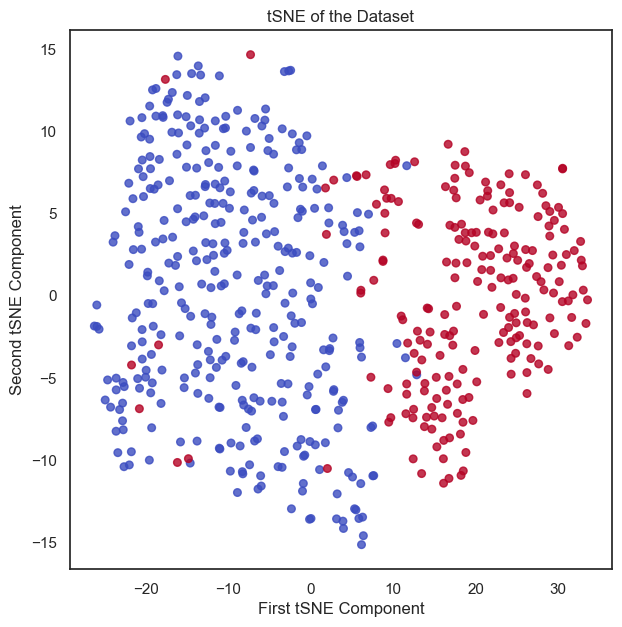

In [376]:
from sklearn.manifold import TSNE

tSNE = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=500)
tSNE_results = tSNE.fit_transform(x_scaled)

print("Projecting the tSNE Analysis onto a 2D frame")
plt.figure(figsize=(7,7))
plt.scatter(tSNE_results[:,0], tSNE_results[:,1], c=y, cmap='coolwarm', alpha=0.8, s=30)
plt.xlabel('First tSNE Component')
plt.ylabel('Second tSNE Component')
plt.title('tSNE of the Dataset')
plt.show()

# Model Synthesis

In [377]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

In [378]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [379]:
x = df.drop(columns=['diagnosis'], axis=1)
y = df['diagnosis']

In [380]:
x

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
0                   0.07871  ...        25.380          17.33   
1                   0.05667  ...        24.990          23.41   
2                   0.05999  ...        23.570          25.53   
3                   0.09744  ...        14.910          26.50   
4                   0.05883  ...        22.540          16.67   
..                      ...  ...           ...            ...   
564                 0.05623  ...        25.450          26.40   
565                 0.05533  ...        23.690          38.25   
566                 0.05648  ...        18.980          34.12   
567                 0.07016  ...        25.740          39.42   
568                 0.05884  ...         9.456          30.37   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0             184.60      2019.0           0.16220            0.66560   
1             158.80      1956.0           0.12380            0.18660   
2             152.50      1709.0           0.14440            0.42450   
3              98.87       567.7           0.20980            0.86630   
4             152.20      1575.0           0.13740            0.20500   
..               ...         ...               ...                ...   
564           166.10      2027.0           0.14100            0.21130   
565           155.00      1731.0           0.11660            0.19220   
566           126.70      1124.0           0.11390            0.30940   
567           184.60      1821.0           0.16500            0.86810   
568            59.16       268.6           0.08996            0.06444   

     concavity_worst  concave points_worst  symmetry_worst  \
0             0.7119                0.2654          0.4601   
1             0.2416                0.1860          0.2750   
2             0.4504                0.2430          0.3613   
3             0.6869                0.2575          0.6638   
4             0.4000                0.1625          0.2364   
..               ...                   ...             ...   
564           0.4107                0.2216         

In [381]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [382]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [383]:
x_train

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
68         9.029         17.33           58.79      250.5          0.10660   
181       21.090         26.57          142.70     1311.0          0.11410   
63         9.173         13.86           59.20      260.9          0.07721   
248       10.650         25.22           68.01      347.0          0.09657   
60        10.170         14.88           64.55      311.9          0.11340   
..           ...           ...             ...        ...              ...   
71         8.888         14.64           58.79      244.0          0.09783   
106       11.640         18.33           75.17      412.5          0.11420   
270       14.290         16.82           90.30      632.6          0.06429   
435       13.980         19.62           91.12      599.5          0.10600   
102       12.180         20.52           77.22      458.7          0.08013   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
68            0.14130         0.31300              0.04375         0.2111   
181           0.28320         0.24870              0.14960         0.2395   
63            0.08751         0.05988              0.02180         0.2341   
248           0.07234         0.02379              0.01615         0.1897   
60            0.08061         0.01084              0.01290         0.2743   
..                ...             ...                  ...            ...   
71            0.15310         0.08606              0.02872         0.1902   
106           0.10170         0.07070              0.03485         0.1801   
270           0.02675         0.00725              0.00625         0.1508   
435           0.11330         0.11260              0.06463         0.1669   
102           0.04038         0.02383              0.01770         0.1739   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
68                  0.08046  ...        10.310          22.65   
181                 0.07398  ...        26.680          33.48   
63                  0.06963  ...        10.010          19.23   
248                 0.06329  ...        12.250          35.19   
60                  0.06960  ...        11.020          17.45   
..                      ...  ...           ...            ...   
71                  0.08980  ...         9.733          15.67   
106                 0.06520  ...        13.140          29.26   
270                 0.05376  ...        14.910          20.65   
435                 0.06544  ...        17.040          30.80   
102                 0.05677  ...        13.340          32.84   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
68             65.50       324.7           0.14820            0.43650   
181           176.50      2089.0           0.14910            0.75840   
63             65.59       310.1           0.09836            0.16780   
248            77.98       455.7           0.14990            0.13980   
60             69.86       368.6           0.12750            0.09866   
..               ...         ...               ...                ...   
71             62.56       284.4           0.12070            0.24360   
106            85.51       521.7           0.16880            0.26600   
270            94.44       684.6           0.08567            0.05036   
435           113.90       869.3           0.16130            0.35680   
102            84.58       547.8           0.11230            0.08862   

     concavity_worst  concave points_worst  symmetry_worst  \
68           1.25200               0.17500          0.4228   
181          0.67800               0.29030          0.4098   
63           0.13970               0.05087          0.3282   
248          0.11250               0.06136          0.3409   
60           0.02168               0.02579          0.3557   
..               ...                   ...             ...   
71           0.14340               0.04786         

In [384]:
x_test

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
204        12.47         18.60           81.09      481.9          0.09965   
70         18.94         21.31          123.60     1130.0          0.09009   
131        15.46         19.48          101.70      748.9          0.10920   
431        12.40         17.68           81.47      467.8          0.10540   
540        11.54         14.44           74.65      402.9          0.09984   
..           ...           ...             ...        ...              ...   
486        14.64         16.85           94.21      666.0          0.08641   
75         16.07         19.65          104.10      817.7          0.09168   
249        11.52         14.93           73.87      406.3          0.10130   
238        14.22         27.85           92.55      623.9          0.08223   
265        20.73         31.12          135.70     1419.0          0.09469   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
204           0.10580         0.08005              0.03821         0.1925   
70            0.10290         0.10800              0.07951         0.1582   
131           0.12230         0.14660              0.08087         0.1931   
431           0.13160         0.07741              0.02799         0.1811   
540           0.11200         0.06737              0.02594         0.1818   
..                ...             ...                  ...            ...   
486           0.06698         0.05192              0.02791         0.1409   
75            0.08424         0.09769              0.06638         0.1798   
249           0.07808         0.04328              0.02929         0.1883   
238           0.10390         0.11030              0.04408         0.1342   
265           0.11430         0.13670              0.08646         0.1769   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
204                 0.06373  ...         14.97          24.64   
70                  0.05461  ...         24.86          26.58   
131                 0.05796  ...         19.26          26.00   
431                 0.07102  ...         12.88          22.91   
540                 0.06782  ...         12.26          19.68   
..                      ...  ...           ...            ...   
486                 0.05355  ...         16.46          25.44   
75                  0.05391  ...         19.77          24.56   
249                 0.06168  ...         12.65          21.19   
238                 0.06129  ...         15.75          40.54   
265                 0.05674  ...         32.49          47.16   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
204            96.05       677.9            0.1426             0.2378   
70            165.90      1866.0            0.1193             0.2336   
131           124.90      1156.0            0.1546             0.2394   
431            89.61       515.8            0.1450             0.2629   
540            78.78       457.8            0.1345             0.2118   
..               ...         ...               ...                ...   
486           106.00       831.0            0.1142             0.2070   
75            128.80      1223.0            0.1500             0.2045   
249            80.88       491.8            0.1389             0.1582   
238           102.50       764.0            0.1081             0.2426   
265           214.00      3432.0            0.1401             0.2644   

     concavity_worst  concave points_worst  symmetry_worst  \
204           0.2671               0.10150          0.3014   
70            0.2687               0.17890          0.2551   
131           0.3791               0.15140          0.2837   
431           0.2403               0.07370          0.2556   
540           0.1797               0.06918          0.2329   
..               ...                   ...             ...   
486           0.2437               0.07828         

In [385]:
y_train

68     0
181    1
63     0
248    0
60     0
      ..
71     0
106    0
270    0
435    1
102    0
Name: diagnosis, Length: 455, dtype: int64

In [386]:
y_test

204    0
70     1
131    1
431    0
540    0
      ..
486    0
75     1
249    0
238    0
265    1
Name: diagnosis, Length: 114, dtype: int64

## Building the model

In [387]:
s_scaler = StandardScaler()
x_train = s_scaler.fit_transform(x_train)
x_test = s_scaler.transform(x_test)

In [388]:
x_train

array([[-1.44075296, -0.43531947, -1.36208497, ...,  0.9320124 ,
         2.09724217,  1.88645014],
       [ 1.97409619,  1.73302577,  2.09167167, ...,  2.6989469 ,
         1.89116053,  2.49783848],
       [-1.39998202, -1.24962228, -1.34520926, ..., -0.97023893,
         0.59760192,  0.0578942 ],
       ...,
       [ 0.04880192, -0.55500086, -0.06512547, ..., -1.23903365,
        -0.70863864, -1.27145475],
       [-0.03896885,  0.10207345, -0.03137406, ...,  1.05001236,
         0.43432185,  1.21336207],
       [-0.54860557,  0.31327591, -0.60350155, ..., -0.61102866,
        -0.3345212 , -0.84628745]])

In [389]:
x_test

array([[-0.46649743, -0.13728933, -0.44421138, ..., -0.19435087,
         0.17275669,  0.20372995],
       [ 1.36536344,  0.49866473,  1.30551088, ...,  0.99177862,
        -0.561211  , -1.00838949],
       [ 0.38006578,  0.06921974,  0.40410139, ...,  0.57035018,
        -0.10783139, -0.20629287],
       ...,
       [-0.73547237, -0.99852603, -0.74138839, ..., -0.27741059,
        -0.3820785 , -0.32408328],
       [ 0.02898271,  2.0334026 ,  0.0274851 , ..., -0.49027026,
        -1.60905688, -0.33137507],
       [ 1.87216885,  2.80077153,  1.80354992, ...,  0.7925579 ,
        -0.05868885, -0.09467243]])

### Logistic Regression

In [390]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [391]:
training_accuracy = lr.score(x_train, y_train)
test_accuracy = lr.score(x_test, y_test)

print(f"Training Accuracy: {training_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Training Accuracy: 0.9868131868131869
Test Accuracy: 0.9736842105263158


In [392]:
y_pred = lr.predict(x_test)

Confusion Matrix for the Logistic Regression Model


<Axes: >

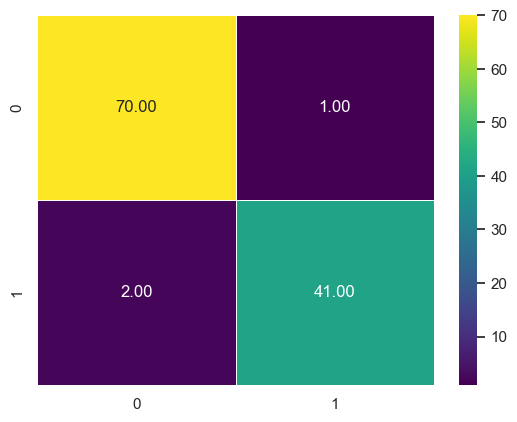

In [393]:
print("Confusion Matrix for the Logistic Regression Model")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)

In [394]:
print("Classification Report for the Logistic Regression Model")
print(classification_report(y_test, y_pred))

Classification Report for the Logistic Regression Model
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



### Decision Tree Classifier

In [395]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [396]:
decision_tree_training_accuracy = decision_tree.score(x_train, y_train)
decision_tree_test_accuracy = decision_tree.score(x_test, y_test)

print(f"Training Accuracy: {decision_tree_training_accuracy}")
print(f"Test Accuracy: {decision_tree_test_accuracy}")

Training Accuracy: 1.0
Test Accuracy: 0.9385964912280702


In [397]:
y_pred = decision_tree.predict(x_test)

Confusion Matrix for the Decision Tree Model


<Axes: >

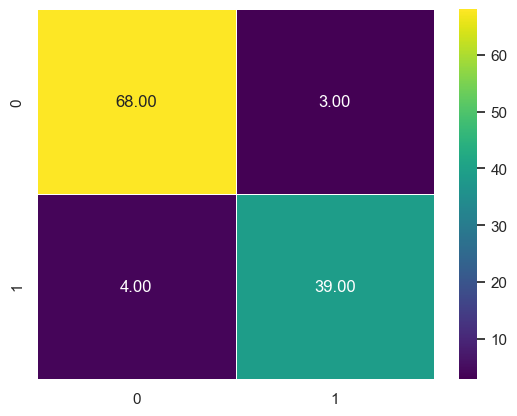

In [398]:
print("Confusion Matrix for the Decision Tree Model")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)

In [399]:
print("Classification Report for the Decision Tree Model")
print(classification_report(y_test, y_pred))

Classification Report for the Decision Tree Model
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        71
           1       0.93      0.91      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



### Random Forest Classifier

In [400]:
random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)

RandomForestClassifier()

In [401]:
training_accuracy = random_forest.score(x_train, y_train)
test_accuracy = random_forest.score(x_test, y_test)

print(f"Training Accuracy: {training_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Training Accuracy: 1.0
Test Accuracy: 0.9649122807017544


In [402]:
y_pred = random_forest.predict(x_test)

Confusion Matrix for the Random Forest Model


<Axes: >

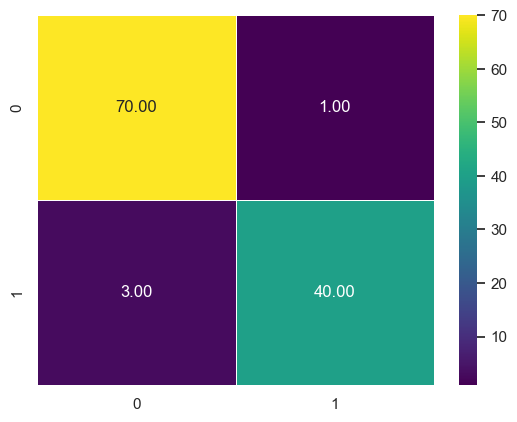

In [403]:
print("Confusion Matrix for the Random Forest Model")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)

In [404]:
print("Classification Report for the Random Forest Model")
print(classification_report(y_test, y_pred))

Classification Report for the Random Forest Model
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



### Support Vector Classifer

In [405]:
svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [406]:
training_accuracy = svc.score(x_train, y_train)
test_accuracy = svc.score(x_test, y_test)

print(f"Training Accuracy: {training_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Training Accuracy: 0.989010989010989
Test Accuracy: 0.9824561403508771


In [407]:
y_pred = svc.predict(x_test)

Confusion Matrix for the Support Vector Classifier Model


<Axes: >

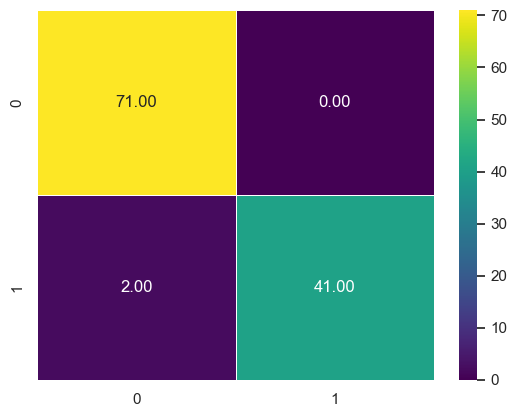

In [408]:
print("Confusion Matrix for the Support Vector Classifier Model")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)

In [409]:
print("Classification Report for the Support Vector Classifier Model")
print(classification_report(y_test, y_pred))

Classification Report for the Support Vector Classifier Model
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



### XGBoost Classifier

In [410]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [411]:
training_accuracy = xgb.score(x_train, y_train)
test_accuracy = xgb.score(x_test, y_test)

print(f"Training Accuracy: {training_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Training Accuracy: 1.0
Test Accuracy: 0.956140350877193


In [412]:
y_pred = xgb.predict(x_test)

Confusion Matrix for the XGBoost Classifier Model


<Axes: >

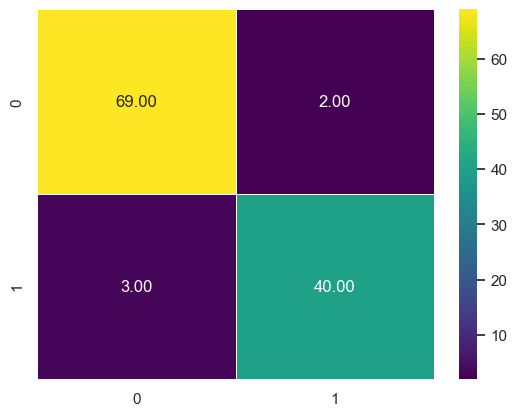

In [413]:
print("Confusion Matrix for the XGBoost Classifier Model")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)

In [414]:
print("Classification Report for the XGBoost Classifier Model")
print(classification_report(y_test, y_pred))

Classification Report for the XGBoost Classifier Model
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



### Artificial Neural Network

In [415]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

# building the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

print(model.summary())

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,097 (16.00 KB)

 Trainable params: 4,097 (16.00 KB)

 Non-trainable params: 0 (0.00 B)

None


In [416]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.1, callbacks=[early_stopping], verbose=1)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5683 - loss: 0.7361 - val_accuracy: 0.8043 - val_loss: 0.4716
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8137 - loss: 0.4467 - val_accuracy: 0.8696 - val_loss: 0.3253
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8160 - loss: 0.3993 - val_accuracy: 0.8913 - val_loss: 0.2485
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8587 - loss: 0.3260 - val_accuracy: 0.8913 - val_loss: 0.2003
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9153 - loss: 0.2633 - val_accuracy: 0.9130 - val_loss: 0.1678
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9292 - loss: 0.2154 - val_accuracy: 0.9130 - val_loss: 0.1435
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9515 - loss: 0.1649 - val_accuracy: 0.9348 - val_loss: 0.1263
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9245 - loss: 0.1626 - val_accuracy: 0.9348 - v

In [417]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9558 - loss: 0.1083 
Test Accuracy: 0.9649122953414917


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Confusion Matrix for the Neural Network Model


<Axes: >

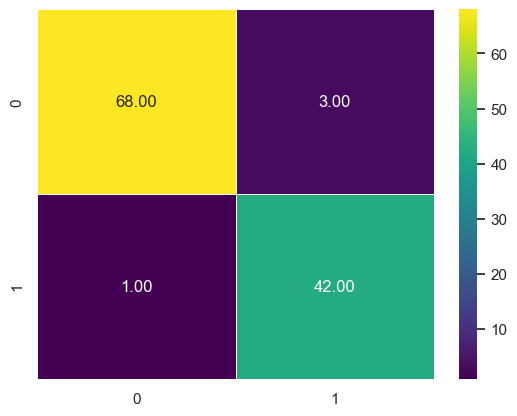

In [418]:
y_pred = model.predict(x_test)
y_pred = np.round(y_pred).astype(int)

print("Confusion Matrix for the Neural Network Model")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)


In [419]:
print("Classification Report for the Neural Network Model")
print(classification_report(y_test, y_pred))

Classification Report for the Neural Network Model
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        71
           1       0.93      0.98      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



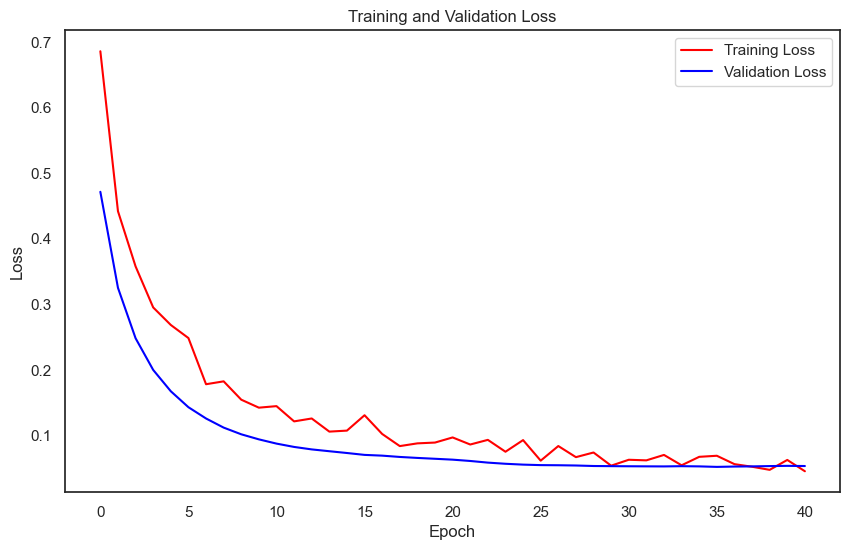

In [420]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='red')
plt.plot(history.history['val_loss'], label='Validation Loss', color='blue')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

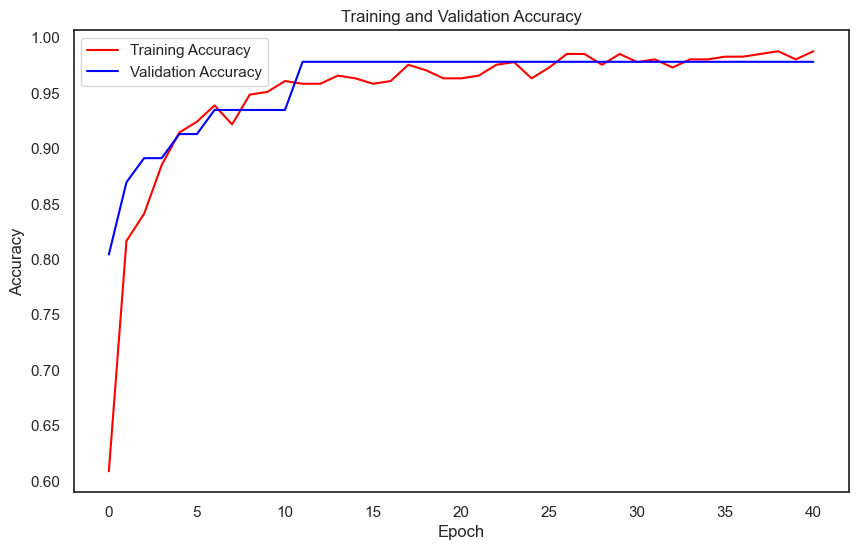

In [421]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='red')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='blue')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

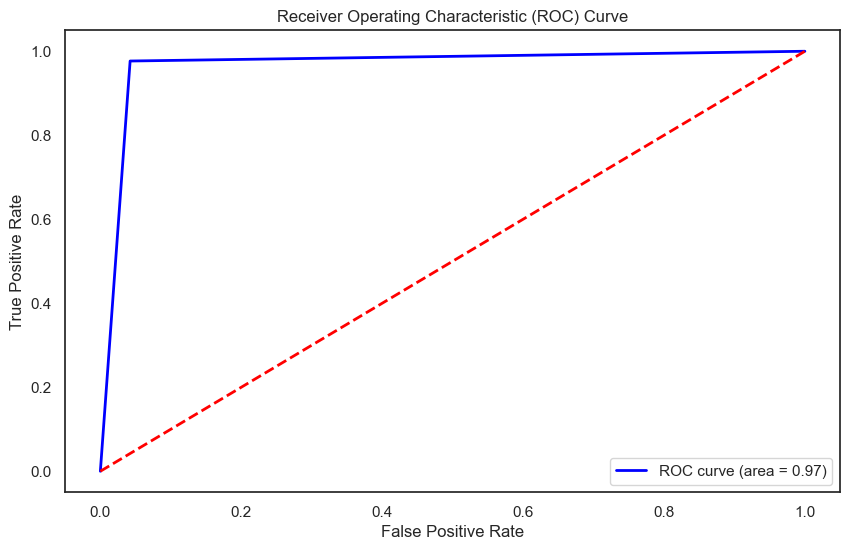

In [423]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Model Evaluation

Logistic Regression AUC: 0.9983622666229938
Decision Tree AUC: 0.9439895185063871
Random Forest AUC: 0.9963969865705863
SVC AUC: 0.9934490664919751
XGBoost AUC: 0.9908286930887651


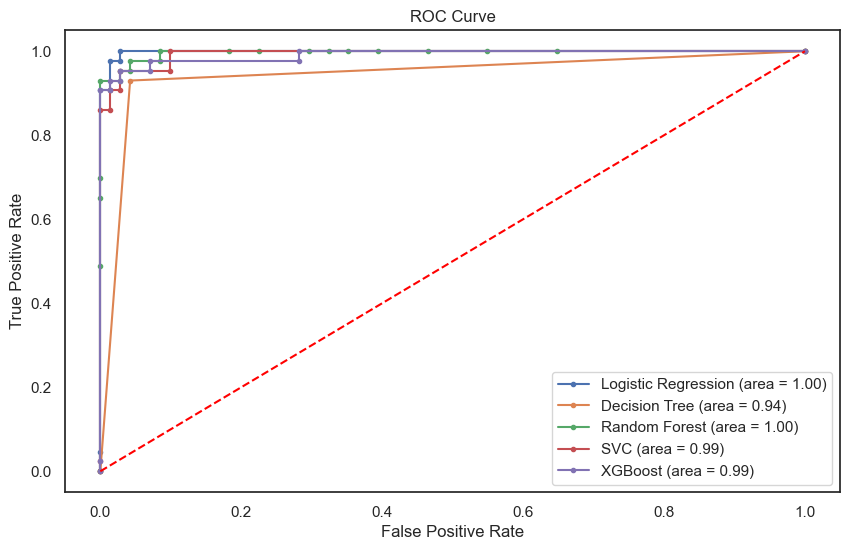

In [424]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

x = df.drop(columns=['diagnosis'], axis=1)
y = df['diagnosis']

x_train = s_scaler.fit_transform(x_train)
x_test = s_scaler.transform(x_test)

# splitting into training and testing components
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

lr = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
svc = SVC()
xgb = XGBClassifier()

lr.fit(x_train, y_train)
decision_tree.fit(x_train, y_train)
random_forest.fit(x_train, y_train)
svc.fit(x_train, y_train)
xgb.fit(x_train, y_train)

lr_probs = lr.predict_proba(x_test)[:,1]
decision_tree_probs = decision_tree.predict_proba(x_test)[:,1]
random_forest_probs = random_forest.predict_proba(x_test)[:,1]
svc_probs = svc.decision_function(x_test)
xgb_probs = xgb.predict_proba(x_test)[:,1]

lr_auc = roc_auc_score(y_test, lr_probs)
decision_tree_auc = roc_auc_score(y_test, decision_tree_probs)
random_forest_auc = roc_auc_score(y_test, random_forest_probs)
svc_auc = roc_auc_score(y_test, svc_probs)
xgb_auc = roc_auc_score(y_test, xgb_probs)

print(f"Logistic Regression AUC: {lr_auc}")
print(f"Decision Tree AUC: {decision_tree_auc}")
print(f"Random Forest AUC: {random_forest_auc}")
print(f"SVC AUC: {svc_auc}")
print(f"XGBoost AUC: {xgb_auc}")

lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
decision_tree_fpr, decision_tree_tpr, _ = roc_curve(y_test, decision_tree_probs)
random_forest_fpr, random_forest_tpr, _ = roc_curve(y_test, random_forest_probs)
svc_fpr, svc_tpr, _ = roc_curve(y_test, svc_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)

plt.figure(figsize=(10, 6))
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression (area = %0.2f)' % lr_auc)
plt.plot(decision_tree_fpr, decision_tree_tpr, marker='.', label='Decision Tree (area = %0.2f)' % decision_tree_auc)
plt.plot(random_forest_fpr, random_forest_tpr, marker='.', label='Random Forest (area = %0.2f)' % random_forest_auc)
plt.plot(svc_fpr, svc_tpr, marker='.', label='SVC (area = %0.2f)' % svc_auc)
plt.plot(xgb_fpr, xgb_tpr, marker='.', label='XGBoost (area = %0.2f)' % xgb_auc)
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
